In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('default')
sns.set_context('paper')

In [2]:
df = pd.read_parquet('/share/pi/nigam/mwornow/ehrshot-benchmark/ehrshot/eda/df__starr__n_gram_counts.parquet')

In [3]:
df1 = df[df['n'] == 1]
df2 = df[df['n'] == 2]
df3 = df[df['n'] == 3]
df4 = df[df['n'] == 4]
df_rr_1 = df1.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_1' })
df_rr_2 = df2.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_2' })
df_rr_3 = df3.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_3' })
df_rr_4 = df4.groupby(['pid',]).agg({ 'count' : lambda x: (x > 1).sum() / len(x) }).reset_index().rename(columns={ 'count' : f'rr_4' })

What percentage of n-grams are repeated?

In [7]:
def plot_percentage_n_grams_repeated(values, n: int):
    plt.hist(values, bins=20, edgecolor='black')
    plt.title(f"# of patients with a given {n}-gram repetition rate")
    # plt.title(f"# of patients whose timelines have x% of {n}-grams repeated")
    plt.ylabel(f"# of patients")
    plt.xlabel(f"Repetition Rate of {n}-grams (i.e. % of {n}-grams that are repeated)")
    plt.plot()
    plt.show()

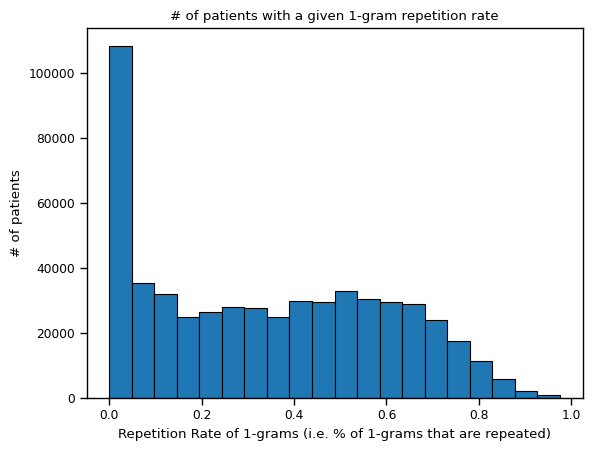

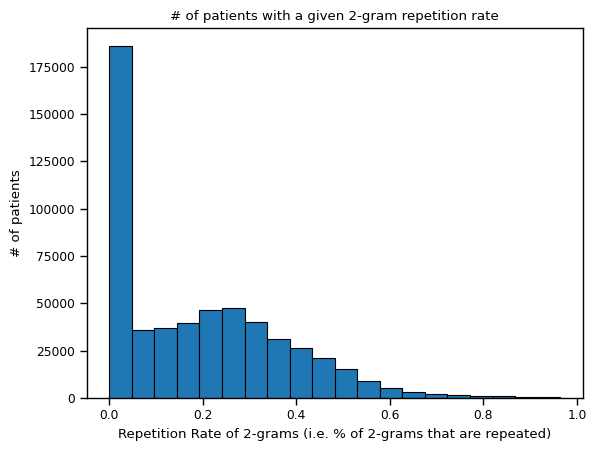

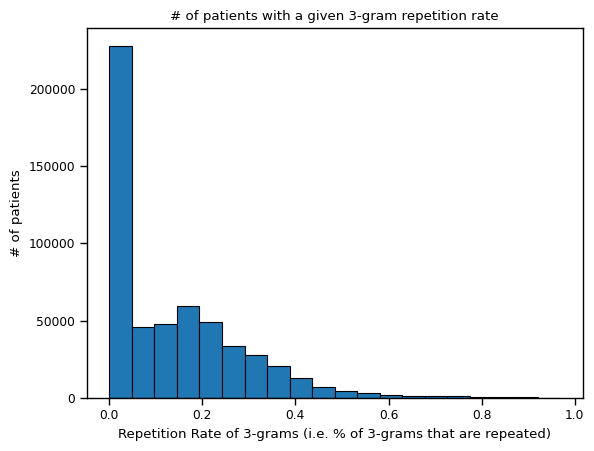

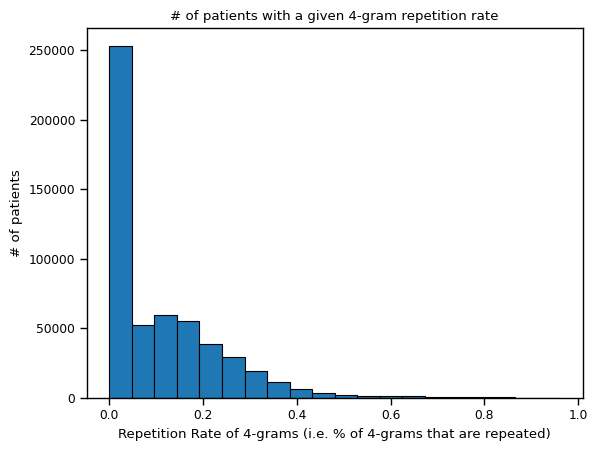

In [10]:
plot_percentage_n_grams_repeated(df_rr_1['rr_1'], 1)
plot_percentage_n_grams_repeated(df_rr_2['rr_2'], 2)
plot_percentage_n_grams_repeated(df_rr_3['rr_3'], 3)
plot_percentage_n_grams_repeated(df_rr_4['rr_4'], 4)